## 📄 Credit Risk Dataset

The Credit Risk Dataset, uploaded by Lao Tse, is a simulated dataset used for developing and evaluating credit risk prediction models. It includes borrower details and loan attributes suitable for binary classification tasks, such as predicting the likelihood of loan default.

### 📊 Dataset Overview

- **Total Records**: 32,581  
- **Number of Features**: 12  
- **Target Variable**: `loan_status` (0 = Non-Default, 1 = Default)  
- **Primary Use Case**: Credit scoring and default prediction

### 🧾 Feature Descriptions

- `person_age`: Age of the borrower  
- `person_income`: Annual income of the borrower  
- `person_home_ownership`: Home ownership status (`RENT`, `OWN`, `MORTGAGE`, etc.)  
- `person_emp_length`: Employment length in years  
- `loan_intent`: Purpose of the loan (`EDUCATION`, `MEDICAL`, `VENTURE`, etc.)  
- `loan_grade`: Loan grade assigned by the lender  
- `loan_amnt`: Requested loan amount  
- `loan_int_rate`: Interest rate on the loan  
- `loan_status`: Loan repayment status (target variable; `0` = Non-Default, `1` = Default)  
- `loan_percent_income`: Ratio of loan amount to income  
- `cb_person_default_on_file`: Whether the borrower has a previous default (`Y` or `N`)  
- `cb_person_cred_hist_length`: Length of the borrower’s credit history in years


In [69]:
# Library imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [70]:
df_credit = pd.read_csv("credit_risk_dataset.csv")
df_credit.info(), df_credit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


(None,
    person_age  person_income person_home_ownership  person_emp_length  \
 0          22          59000                  RENT              123.0   
 1          21           9600                   OWN                5.0   
 2          25           9600              MORTGAGE                1.0   
 3          23          65500                  RENT                4.0   
 4          24          54400                  RENT                8.0   
 
   loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
 0    PERSONAL          D      35000          16.02            1   
 1   EDUCATION          B       1000          11.14            0   
 2     MEDICAL          C       5500          12.87            1   
 3     MEDICAL          C      35000          15.23            1   
 4     MEDICAL          C      35000          14.27            1   
 
    loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
 0                 0.59                         Y        

## EDA

C:\Users\Anders\AppData\Local\Temp\ipykernel_21264\1687797607.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_credit, x='loan_status', palette='pastel')


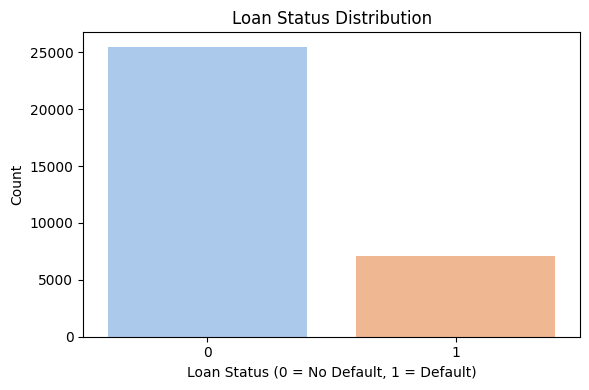

In [71]:
# Target class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_credit, x='loan_status', palette='pastel')
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status (0 = No Default, 1 = Default)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

C:\Users\Anders\AppData\Local\Temp\ipykernel_21264\1766221315.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_credit, x='loan_intent', order=df_credit['loan_intent'].value_counts().index, palette='muted')


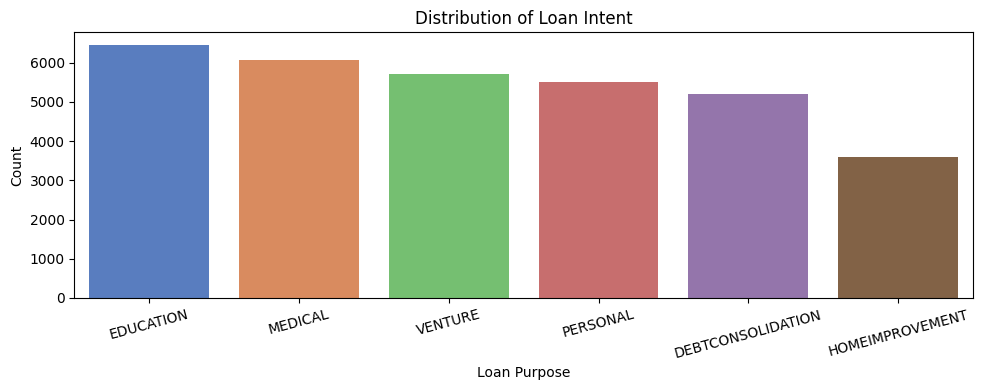

In [72]:
# Distribution of loan intent
plt.figure(figsize=(10, 4))
sns.countplot(data=df_credit, x='loan_intent', order=df_credit['loan_intent'].value_counts().index, palette='muted')
plt.title("Distribution of Loan Intent")
plt.xlabel("Loan Purpose")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


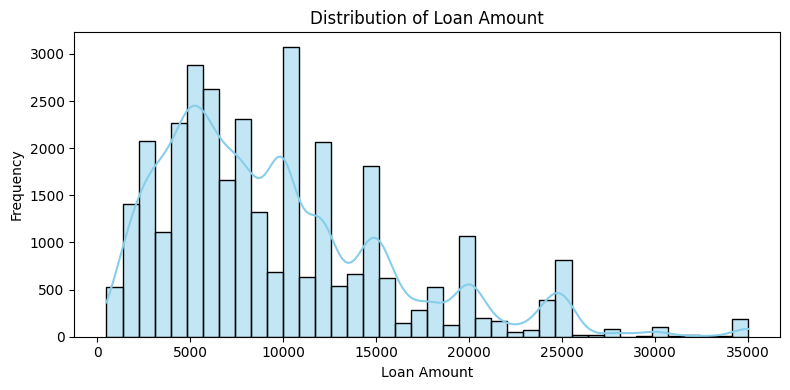

In [73]:
# Distribution of loan amount
plt.figure(figsize=(8, 4))
sns.histplot(data=df_credit, x='loan_amnt', bins=40, kde=True, color='skyblue')
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


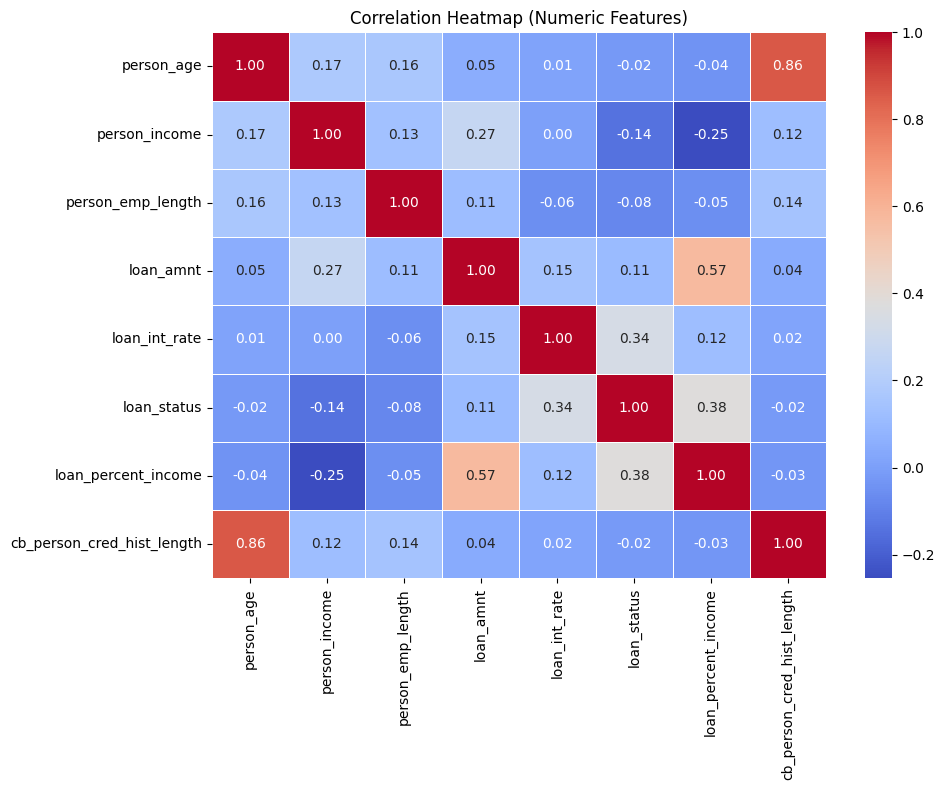

In [74]:
# Select only numeric features for correlation analysis
numeric_cols = df_credit.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df_credit[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()


In [75]:
# Checking for missing values 
df_credit.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [76]:
# Drop rows with missing values
df_cleaned = df_credit.dropna()

# Confirm that missing values are handled
df_cleaned.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [77]:
# Encode categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder

df_encoded = df_cleaned.copy()
label_cols = df_encoded.select_dtypes(include='object').columns

encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    encoders[col] = le  # Save encoders if needed later

# Ceaned and encoded dataset
df_encoded.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df_encoded.drop(columns=['loan_status'])
y = df_encoded['loan_status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=10
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model Testing with Hyperparameter Tuning included

### Logistic Regression

In [79]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Hyperparameter distributions
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # solvers that support both penalties
}

# Initialize base model
logreg = LogisticRegression(max_iter=1000, random_state=10)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=logreg,
    param_distributions=param_dist,
    n_iter=10,
    scoring='roc_auc',
    cv=5,
    random_state=10,
    n_jobs=-1
)

# Fit model
random_search.fit(X_train_scaled, y_train)

# Best model
best_logreg = random_search.best_estimator_

# Evaluate
y_pred_lr = best_logreg.predict(X_test_scaled)
y_proba_lr = best_logreg.predict_proba(X_test_scaled)[:, 1]

print("Best Parameters:", random_search.best_params_)
print("\nLogistic Regression – Classification Report")
print(classification_report(y_test, y_pred_lr, digits=4))
print(f"AUC: {roc_auc_score(y_test, y_proba_lr):.4f}")



Best Parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 1}

Logistic Regression – Classification Report
              precision    recall  f1-score   support

           0     0.8667    0.9489    0.9060      6731
           1     0.7187    0.4723    0.5700      1861

    accuracy                         0.8457      8592
   macro avg     0.7927    0.7106    0.7380      8592
weighted avg     0.8347    0.8457    0.8332      8592

AUC: 0.8494


### Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Hyperparameter distributions
param_dist = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize base model
dt = DecisionTreeClassifier(random_state=10)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=10,
    scoring='roc_auc',
    cv=5,
    random_state=10,
    n_jobs=-1
)

# Fit model
random_search.fit(X_train_scaled, y_train)

# Best model
best_dt = random_search.best_estimator_

# Predict on test set
y_pred_dt = best_dt.predict(X_test_scaled)
y_proba_dt = best_dt.predict_proba(X_test_scaled)[:, 1]

# Evaluate
print("Best Parameters:", random_search.best_params_)
print("\nDecision Tree – Classification Report")
print(classification_report(y_test, y_pred_dt, digits=4))
print(f"AUC: {roc_auc_score(y_test, y_proba_dt):.4f}")



Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'entropy'}

Decision Tree – Classification Report
              precision    recall  f1-score   support

           0     0.9230    0.9869    0.9539      6731
           1     0.9369    0.7023    0.8028      1861

    accuracy                         0.9253      8592
   macro avg     0.9300    0.8446    0.8784      8592
weighted avg     0.9260    0.9253    0.9212      8592

AUC: 0.9004


### Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Hyperparameter distributions
param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize base model
rf = RandomForestClassifier(random_state=10)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    scoring='roc_auc',
    cv=5,
    random_state=10,
    n_jobs=-1
)

# Fit model
random_search.fit(X_train_scaled, y_train)

# Best model
best_rf = random_search.best_estimator_

# Predict on test set
y_pred_rf = best_rf.predict(X_test_scaled)
y_proba_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

# Evaluate
print("Best Parameters:", random_search.best_params_)
print("\nRandom Forest – Classification Report")
print(classification_report(y_test, y_pred_rf, digits=4))
print(f"AUC: {roc_auc_score(y_test, y_proba_rf):.4f}")


Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}

Random Forest – Classification Report
              precision    recall  f1-score   support

           0     0.9247    0.9929    0.9576      6731
           1     0.9648    0.7077    0.8165      1861

    accuracy                         0.9311      8592
   macro avg     0.9448    0.8503    0.8870      8592
weighted avg     0.9334    0.9311    0.9270      8592

AUC: 0.9302


### XGBoost

In [82]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Hyperparameter distributions
param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize base model
xgb = XGBClassifier(eval_metric='logloss', random_state=10)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=10,
    scoring='roc_auc',
    cv=5,
    random_state=10,
    n_jobs=-1
)

# Fit model
random_search.fit(X_train_scaled, y_train)

# Best model
best_xgb = random_search.best_estimator_

# Predict on test set
y_pred_xgb = best_xgb.predict(X_test_scaled)
y_proba_xgb = best_xgb.predict_proba(X_test_scaled)[:, 1]

# Evaluate
print("Best Parameters:", random_search.best_params_)
print("\nXGBoost – Classification Report")
print(classification_report(y_test, y_pred_xgb, digits=4))
print(f"AUC: {roc_auc_score(y_test, y_proba_xgb):.4f}")


Best Parameters: {'subsample': 1.0, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.9}

XGBoost – Classification Report
              precision    recall  f1-score   support

           0     0.9304    0.9912    0.9599      6731
           1     0.9585    0.7319    0.8300      1861

    accuracy                         0.9351      8592
   macro avg     0.9444    0.8615    0.8949      8592
weighted avg     0.9365    0.9351    0.9317      8592

AUC: 0.9479


# ROC Curve SML

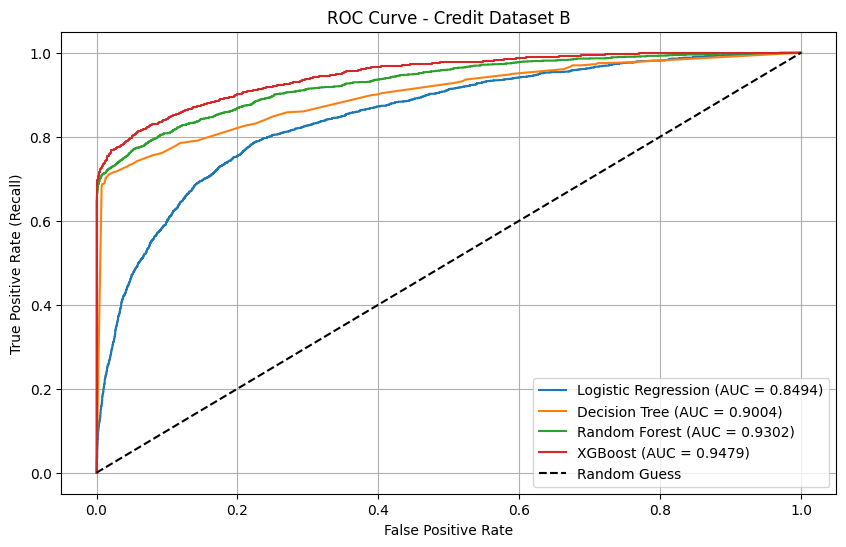

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curves and AUCs
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

auc_lr = auc(fpr_lr, tpr_lr)
auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.4f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Credit Dataset B')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Including UML

In [84]:
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans

# Scale full feature set for unsupervised models
X_scaled = scaler.fit_transform(X)

# KMeans Clustering
X["kmeans_cluster"] = KMeans(n_clusters=5, random_state=10).fit_predict(X_scaled)

# Isolation Forest (continuous anomaly score)
iso = IsolationForest(contamination=0.05, random_state=10)
X["anomaly_score"] = iso.fit(X_scaled).decision_function(X_scaled)




### Hyperparameter tuning from previous distributions

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Scale full feature set for unsupervised models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add KMeans cluster labels
X["kmeans_cluster"] = KMeans(n_clusters=5, random_state=10).fit_predict(X_scaled)

# Add Isolation Forest anomaly score
iso = IsolationForest(contamination=0.05, random_state=10)
X["anomaly_score"] = iso.fit(X_scaled).decision_function(X_scaled)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=10)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define classifiers with best parameters
models = {
    "Logistic Regression": LogisticRegression(
        solver='saga', penalty='l1', C=1, max_iter=500, multi_class='auto', random_state=10
    ),
    "Decision Tree": DecisionTreeClassifier(
        criterion='entropy', max_depth=10, min_samples_split=10, min_samples_leaf=2, random_state=10
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200, max_depth=30, min_samples_split=10, min_samples_leaf=1,
        max_features='sqrt', random_state=10
    ),
    "XGBoost": XGBClassifier(
        n_estimators=200, max_depth=30, min_child_weight=1, colsample_bytree=0.8, eval_metric='logloss', random_state=10
    )
}

# Train and predict
model_probs = {}
for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    if hasattr(model, "predict_proba"):
        model_probs[name] = model.predict_proba(X_test)[:, 1]
    else:
        model_probs[name] = model.decision_function(X_test)


C:\Users\Anders\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# Define the base features
unsupervised_cols = ["kmeans_cluster", "anomaly_score", "lof_score", "svm_score", "dbscan_cluster"]
base_cols = [col for col in X.columns if col not in unsupervised_cols]

X_base = X[base_cols].copy()
X_hybrid = X.copy()  # already includes unsupervised features


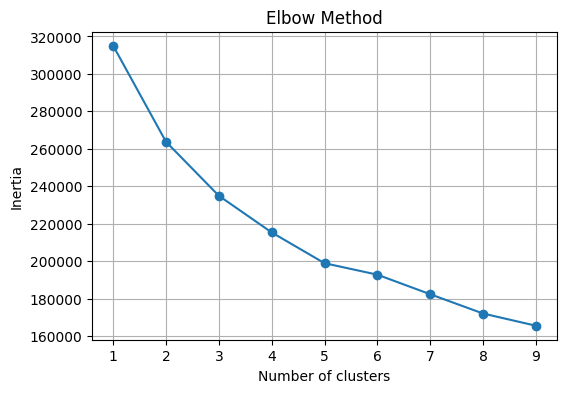

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Preprocess data
df_model = df_credit.dropna().copy()
cat_cols = df_model.select_dtypes(include='object').columns
for col in cat_cols:
    df_model[col] = LabelEncoder().fit_transform(df_model[col])
X = df_model.drop(columns=['loan_status'])
y = df_model['loan_status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=10).fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

### Using 3 clusters for K-means clustering

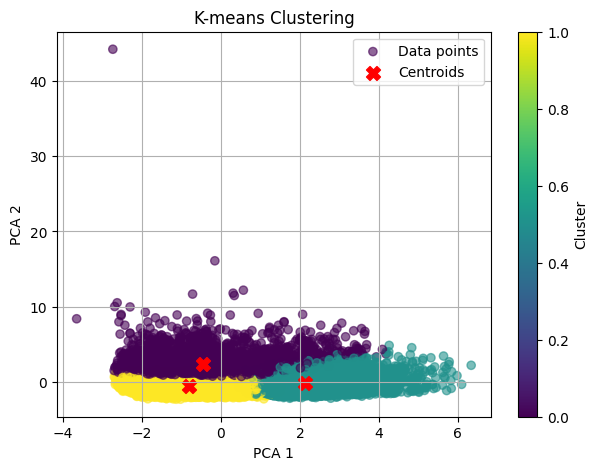

In [ ]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=10)
kmeans.fit(X_scaled)
clusters = kmeans.labels_

# Transform centroids into PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Plot
plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6, label='Data points')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=100, marker='X', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.show()


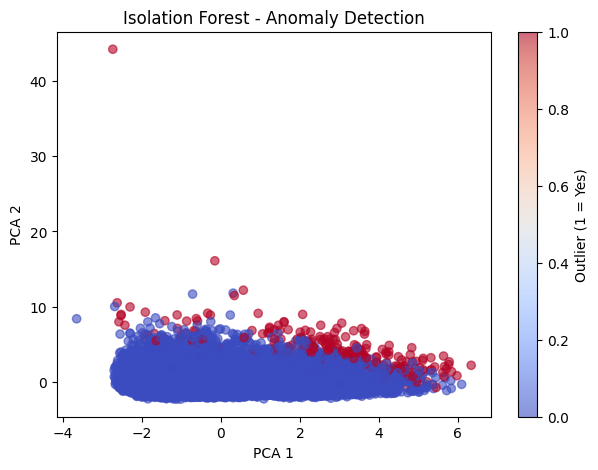

In [ ]:
# Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=10)
outliers = iso.fit_predict(X_scaled)

plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=(outliers == -1), cmap='coolwarm', alpha=0.6)
plt.title('Isolation Forest - Anomaly Detection')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Outlier (1 = Yes)')
plt.show()


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df_encoded.drop(columns=['loan_status'])
y = df_encoded['loan_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=10
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)


In [91]:
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
import pandas as pd

# Combine train and test for consistent clustering
X_all_scaled = pd.concat([X_train_scaled, X_test_scaled])

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=10)
kmeans_labels = kmeans.fit_predict(X_all_scaled)
X_train_kmeans = kmeans_labels[:len(X_train_scaled)]
X_test_kmeans = kmeans_labels[len(X_train_scaled):]

# Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=10)
iso_labels = iso.fit_predict(X_all_scaled)
X_train_iso = iso_labels[:len(X_train_scaled)]
X_test_iso = iso_labels[len(X_train_scaled):]

# Add to feature sets
X_train_aug = X_train_scaled.copy()
X_test_aug = X_test_scaled.copy()
X_train_aug['kmeans_cluster'] = X_train_kmeans
X_test_aug['kmeans_cluster'] = X_test_kmeans
X_train_aug['iso_outlier'] = X_train_iso
X_test_aug['iso_outlier'] = X_test_iso


### ROC Curve with UML features included

C:\Users\Anders\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [00:23:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


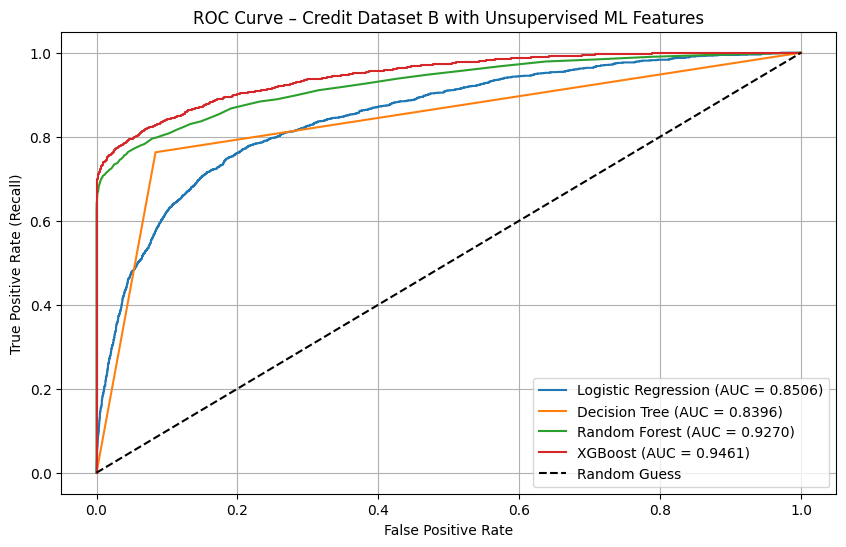

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train models
logreg = LogisticRegression(max_iter=1000, random_state=10).fit(X_train_aug, y_train)
dt = DecisionTreeClassifier(random_state=10).fit(X_train_aug, y_train)
rf = RandomForestClassifier(n_estimators=100, random_state=10).fit(X_train_aug, y_train)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=10).fit(X_train_aug, y_train)

# Predict probabilities
y_proba_lr = logreg.predict_proba(X_test_aug)[:, 1]
y_proba_dt = dt.predict_proba(X_test_aug)[:, 1]
y_proba_rf = rf.predict_proba(X_test_aug)[:, 1]
y_proba_xgb = xgb.predict_proba(X_test_aug)[:, 1]

# Compute ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

auc_lr = auc(fpr_lr, tpr_lr)
auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.4f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve – Credit Dataset B with Unsupervised ML Features')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### Looking at classification report

In [93]:
from sklearn.metrics import classification_report

# Predict class labels
y_pred_lr = logreg.predict(X_test_aug)
y_pred_dt = dt.predict(X_test_aug)
y_pred_rf = rf.predict(X_test_aug)
y_pred_xgb = xgb.predict(X_test_aug)

# Print classification reports
print("📊 Logistic Regression")
print(classification_report(y_test, y_pred_lr, digits=4))

print("\n🌳 Decision Tree")
print(classification_report(y_test, y_pred_dt, digits=4))

📊 Logistic Regression
              precision    recall  f1-score   support

           0     0.8684    0.9483    0.9066      6731
           1     0.7198    0.4804    0.5762      1861

    accuracy                         0.8470      8592
   macro avg     0.7941    0.7143    0.7414      8592
weighted avg     0.8362    0.8470    0.8350      8592


🌳 Decision Tree
              precision    recall  f1-score   support

           0     0.9333    0.9162    0.9247      6731
           1     0.7157    0.7630    0.7386      1861

    accuracy                         0.8830      8592
   macro avg     0.8245    0.8396    0.8316      8592
weighted avg     0.8861    0.8830    0.8844      8592



In [94]:
print("\n🌲 Random Forest")
print(classification_report(y_test, y_pred_rf, digits=4))

print("\n⚡ XGBoost")
print(classification_report(y_test, y_pred_xgb, digits=4))



🌲 Random Forest
              precision    recall  f1-score   support

           0     0.9245    0.9903    0.9563      6731
           1     0.9530    0.7077    0.8122      1861

    accuracy                         0.9291      8592
   macro avg     0.9388    0.8490    0.8843      8592
weighted avg     0.9307    0.9291    0.9251      8592


⚡ XGBoost
              precision    recall  f1-score   support

           0     0.9316    0.9909    0.9603      6731
           1     0.9574    0.7367    0.8327      1861

    accuracy                         0.9359      8592
   macro avg     0.9445    0.8638    0.8965      8592
weighted avg     0.9372    0.9359    0.9327      8592



### Interpretability using SHAP

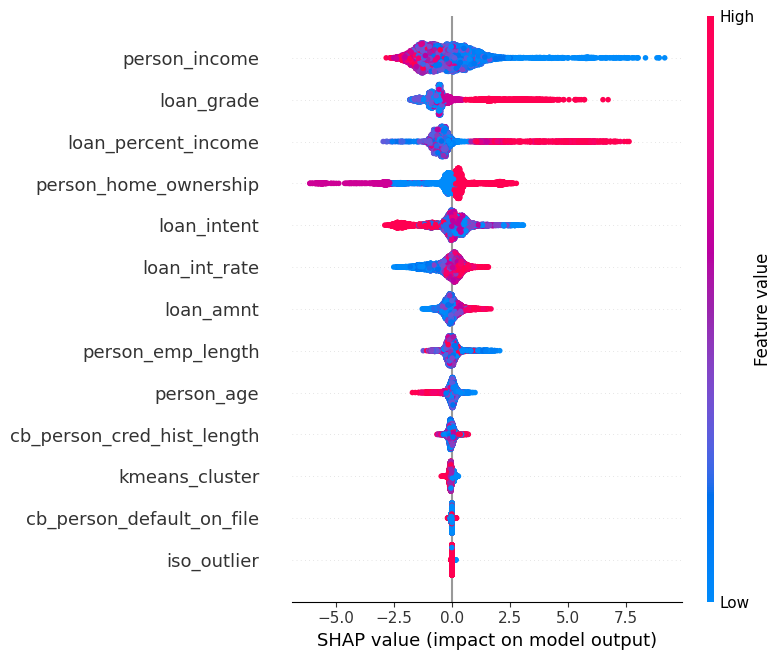

In [95]:
import shap

# Initialize SHAP explainer (use TreeExplainer for tree-based models)
explainer = shap.TreeExplainer(xgb)  # or xgb
shap_values = explainer.shap_values(X_test_aug)

# Summary plot (bar form shows overall importance)
shap.summary_plot(shap_values, X_test_aug, plot_type='dot')
